In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

In [18]:
# Load dataset
file_path = 'crop_data.csv'  # Update this to your dataset's location
data = pd.read_csv(file_path)
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [19]:
# Preprocessing
def preprocess_data(data):
    # Handle missing values
    data = data.dropna()

    # Encode target labels
    label_encoder = LabelEncoder()
    data['label'] = label_encoder.fit_transform(data['label'])

    # Separate features and target
    X = data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
    y = data['label']

    return X, y, label_encoder

X, y, label_encoder = preprocess_data(data)
preprocess_data(data)

(        N   P   K  temperature   humidity        ph    rainfall
 0      90  42  43    20.879744  82.002744  6.502985  202.935536
 1      85  58  41    21.770462  80.319644  7.038096  226.655537
 2      60  55  44    23.004459  82.320763  7.840207  263.964248
 3      74  35  40    26.491096  80.158363  6.980401  242.864034
 4      78  42  42    20.130175  81.604873  7.628473  262.717340
 ...   ...  ..  ..          ...        ...       ...         ...
 2195  107  34  32    26.774637  66.413269  6.780064  177.774507
 2196   99  15  27    27.417112  56.636362  6.086922  127.924610
 2197  118  33  30    24.131797  67.225123  6.362608  173.322839
 2198  117  32  34    26.272418  52.127394  6.758793  127.175293
 2199  104  18  30    23.603016  60.396475  6.779833  140.937041
 
 [2200 rows x 7 columns],
 0       20
 1       20
 2       20
 3       20
 4       20
         ..
 2195     5
 2196     5
 2197     5
 2198     5
 2199     5
 Name: label, Length: 2200, dtype: int64,
 LabelEncoder())

In [20]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [22]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42) }

In [23]:
# Train and evaluate models
evaluation_results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)

    # Predictions
    y_pred = model.predict(X_test_scaled)

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Store results
    evaluation_results[model_name] = {
        'Accuracy': accuracy,
        'F1 Score': f1,
        'Confusion Matrix': conf_matrix,
        'Classification Report': classification_report(y_test, y_pred)
    }



Model: Logistic Regression
Accuracy: 0.9636
F1 Score: 0.9635
Confusion Matrix:
[[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 19  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0 20  0  0  0  0  0  0  0  0  1  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 

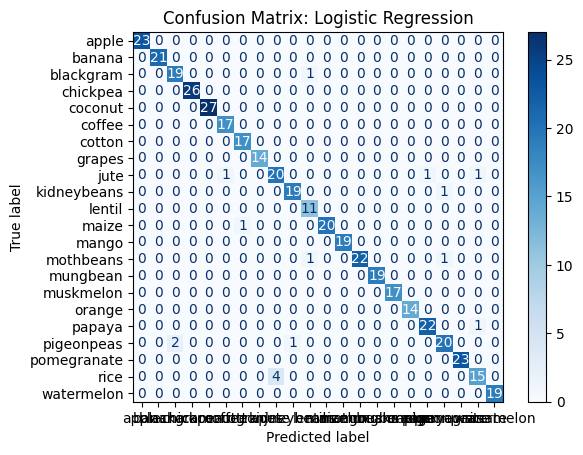

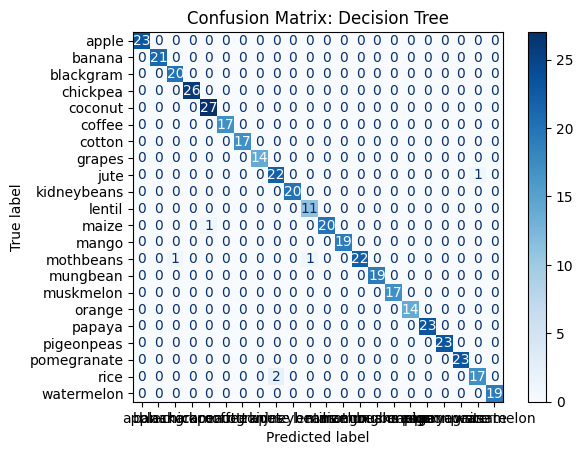

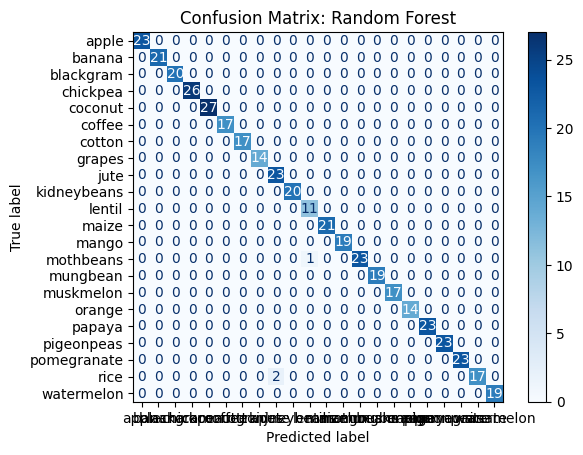

In [24]:
# Print evaluation results
for model_name, metrics in evaluation_results.items():
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"F1 Score: {metrics['F1 Score']:.4f}")
    print("Confusion Matrix:")
    print(metrics['Confusion Matrix'])
    print("Classification Report:")
    print(metrics['Classification Report'])
    # Confusion Matrices for Each Model
for model_name, metrics in evaluation_results.items():
    conf_matrix = metrics['Confusion Matrix']
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix: {model_name}')
    plt.show()

In [25]:
# Select the best model based on F1 Score
best_model_name = max(evaluation_results, key=lambda name: evaluation_results[name]['F1 Score'])
best_model = models[best_model_name]
print(f"\nBest Performing Model: {best_model_name}")


Best Performing Model: Random Forest


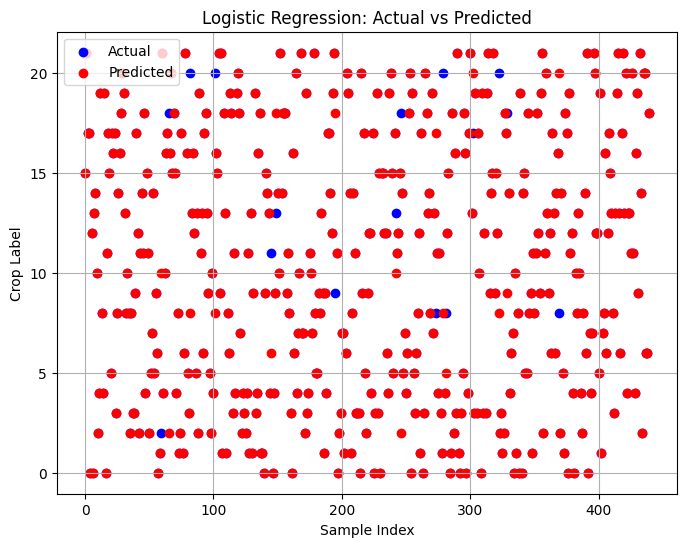

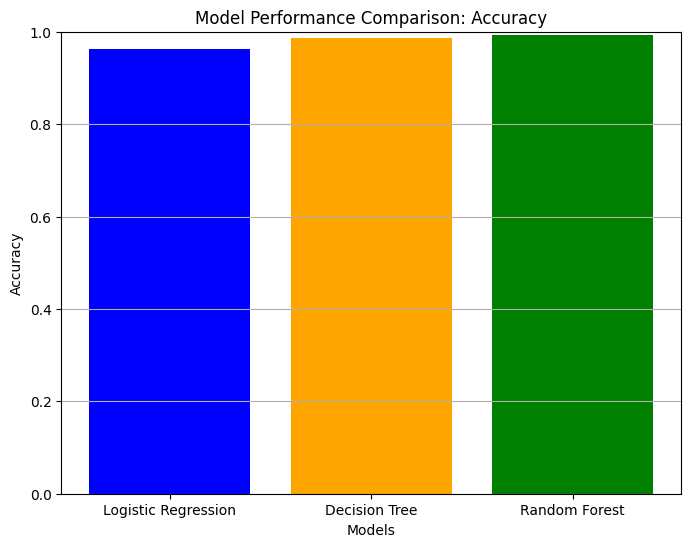

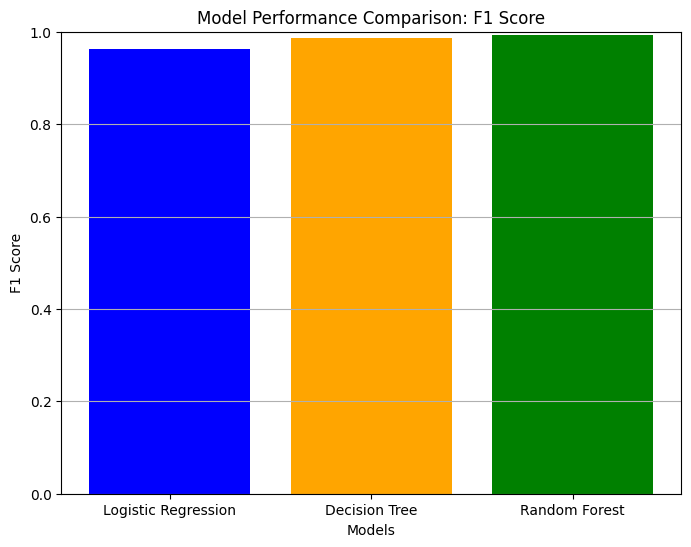

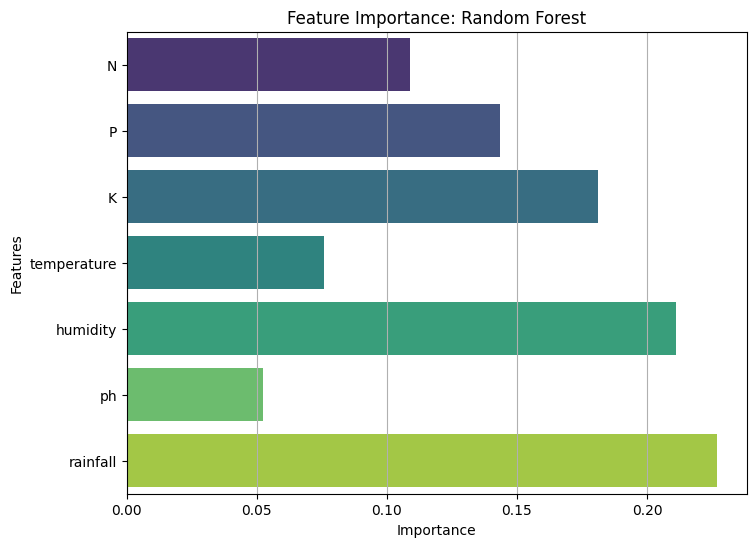

Data Visualizations Complete!


In [26]:
# 1. Actual vs Predicted for Logistic Regression
logistic_regression = models['Logistic Regression']
y_pred_logistic = logistic_regression.predict(X_test_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_pred_logistic)), y_pred_logistic, color='red', label='Predicted')
plt.title('Logistic Regression: Actual vs Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Crop Label')
plt.legend()
plt.grid()
plt.show()

# 2. Model Performance Comparison
metrics = ['Accuracy', 'F1 Score']
performance = {metric: [evaluation_results[model][metric] for model in models.keys()] for metric in metrics}

for metric in metrics:
    plt.figure(figsize=(8, 6))
    plt.bar(models.keys(), performance[metric], color=['blue', 'orange', 'green'])
    plt.title(f'Model Performance Comparison: {metric}')
    plt.ylabel(metric)
    plt.xlabel('Models')
    plt.ylim(0, 1)
    plt.grid(axis='y')
    plt.show()



# 3. Feature Importance for Random Forest
if 'Random Forest' in models:
    random_forest = models['Random Forest']
    feature_importances = random_forest.feature_importances_
    features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

    plt.figure(figsize=(8, 6))
    sns.barplot(x=feature_importances, y=features, hue=features, dodge=False, palette='viridis', legend=False)
    plt.title('Feature Importance: Random Forest')
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.grid(axis='x')
    plt.show()

print("Data Visualizations Complete!")


In [27]:
# Predict crop for user input
def predict_crop(model, scaler, user_input):
    user_input_scaled = scaler.transform([user_input])
    predicted_label = model.predict(user_input_scaled)[0]
    return label_encoder.inverse_transform([predicted_label])[0]

In [28]:
print("\nEnter soil and environmental parameters:")
N = float(input("Nitrogen (N) [range: 0-100]: "))
P = float(input("Phosphorus (P) [range: 0-100]: "))
K = float(input("Potassium (K) [range: 0-100]: "))
temperature = float(input("Temperature [range: -20 to 50 °C]: "))
humidity = float(input("Humidity [range: 0-100%]: "))
ph = float(input("pH [range: 1-12]: "))
rainfall = float(input("Rainfall [range: 0-300 mm]: "))

# Define feature names
feature_names = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

# Create a DataFrame for user input
user_input = pd.DataFrame([[N, P, K, temperature, humidity, ph, rainfall]], columns=feature_names)

# Scale the input
user_input_scaled = scaler.transform(user_input)

# Predict the crop
predicted_crop = best_model.predict(user_input_scaled)[0]

# Decode the prediction to crop name
predicted_crop_name = label_encoder.inverse_transform([predicted_crop])[0]

print(f"\nThe most suitable crop for the given conditions is: {predicted_crop_name}")



Enter soil and environmental parameters:
Nitrogen (N) [range: 0-100]: 22
Phosphorus (P) [range: 0-100]: 55
Potassium (K) [range: 0-100]: 22
Temperature [range: -20 to 50 °C]: 32
Humidity [range: 0-100%]: 80
pH [range: 1-12]: 4
Rainfall [range: 0-300 mm]: 206

The most suitable crop for the given conditions is: mungbean
